Unidade: **Engenharia de Atributos**
Tema: **Técnicas para Pré-processamento de Dados**

In [ ]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dados experimentais

In [ ]:
url_dados = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
dados = pd.read_csv(url_dados, header=None, sep=',', na_values=[' ?', '?', '? '], names=colunas)

In [ ]:
dados.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Eliminação de atributos

In [ ]:
dados.drop('fnlwgt', axis=1, inplace=True)
# dados2 = dados.drop('relationship', axis=1, inplace=False)

In [ ]:
dados.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Tratamento de dados desbalanceados

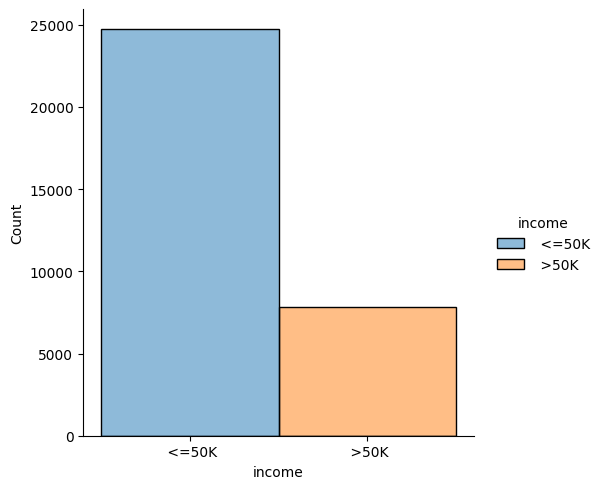

In [ ]:
sns.displot(dados, x="income", hue="income")
plt.show()

In [ ]:
# Divide o conjunto de dados pelas duas classes
class_menor50 = dados[dados['income'] == ' <=50K']
class_maior50 = dados[dados['income'] == ' >50K']

# Exibe a quantidade de dados por classe
print('<=50k:', len(class_menor50))
print('>50k:', len(class_maior50))

<=50k: 24720
>50k: 7841


In [ ]:
# Equilibra a classe majoritária (<=50)
# conforme o tamanho da classe minoritária (>50)
nova_class_menor50 = class_menor50.sample(len(class_maior50))
novos_dados = pd.concat([nova_class_menor50, class_maior50], axis=0)
novos_dados.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19405,47,Private,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,33,United-States,<=50K
7566,27,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K
24390,49,State-gov,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,50,United-States,<=50K
8007,44,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
948,43,Private,Some-college,10,Divorced,Craft-repair,Unmarried,White,Male,0,0,35,United-States,<=50K


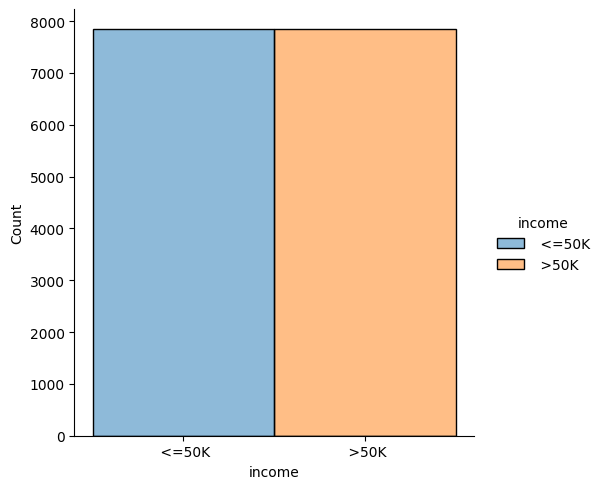

In [ ]:
# Plota a nova distribuição de classes
sns.displot(novos_dados, x="income", hue="income")
plt.show()

In [ ]:
# Pre